<a href="https://colab.research.google.com/github/viraj7676/new/blob/main/Text_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/IMDB Dataset.csv", encoding='utf-8')
df = df.sample(n=5000).reset_index(drop=True)
df.head()

,review,sentiment
0,"In the autobiographical coming-of-age tale ""Ro...",negative
1,Another French film with absurdity. Baise-Moi(...,negative
2,Magicians is a wonderful ride from start to fi...,positive
3,*spoiler* *spoilers* *spoilers* I found the fi...,positive
4,It may (or may not) be considered interesting ...,positive


In [ ]:
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (only the first time)
nltk.download('stopwords')

# Initialize the stemmer and stopwords list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_review_with_stopwords_and_stemming(review):
    # Decode HTML entities (like <br /> to actual line breaks)
    review = html.unescape(review)

    # Remove HTML tags (e.g., <br />)
    review = re.sub(r'<.*?>', '', review)

    # Convert to lowercase
    review = review.lower()

    # Remove non-alphabetic characters and digits
    review = re.sub(r'[^a-z\s]', '', review)

    # Tokenization: Split the review into words
    words = review.split()

    # Remove stopwords and apply stemming
    cleaned_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Rejoin the words back into a cleaned string
    cleaned_review = ' '.join(cleaned_words)

    return cleaned_review


# Assuming df is your DataFrame with reviews
df['review'] = df['review'].apply(clean_review_with_stopwords_and_stemming)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,autobiograph comingofag tale romulu father eri...,negative
1,anoth french film absurd baisemoifck tell stor...,negative
2,magician wonder ride start finish thank larg p...,positive
3,spoiler spoiler spoiler found film amusingit w...,positive
4,may may consid interest reason realli check mo...,positive
...,...,...
4995,mani consid black cat best karlofflugosi colla...,positive
4996,film rather disappoint slow intens quit gori b...,negative
4997,believ suppos shock someth say ispoor goat fli...,negative
4998,grew watch boweri boy weekend even young age c...,negative


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,autobiograph comingofag tale romulu father eri...,0
1,anoth french film absurd baisemoifck tell stor...,0
2,magician wonder ride start finish thank larg p...,1
3,spoiler spoiler spoiler found film amusingit w...,1
4,may may consid interest reason realli check mo...,1


In [ ]:
RANDOM_STATE = 42
text_train, text_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.1, random_state=RANDOM_STATE)

In [ ]:
# Tokenize and transform to integer index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(len(x) for x in X_train) # longest text in train set

# Add padding to ensure all vectors have the same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


X_train

array([[ 8805,   677, 12355, ...,     0,     0,     0],
       [    6,     2,   327, ...,     0,     0,     0],
       [  423,   123,  2237, ...,     0,     0,     0],
       ...,
       [   87,     6,    76, ...,     0,     0,     0],
       [    1,    35,     3, ...,     0,     0,     0],
       [  636,  7872,  1313, ...,     0,     0,     0]], dtype=int32)

In [ ]:
# Define CNN model
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())


model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, epochs=5,batch_size=64,verbose=True, validation_data=(X_test, y_test))

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.5700 - loss: 0.6855 - val_accuracy: 0.7220 - val_loss: 0.5675
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8018 - loss: 0.4618 - val_accuracy: 0.8180 - val_loss: 0.3978
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9611 - loss: 0.1611 - val_accuracy: 0.8220 - val_loss: 0.4053
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9970 - loss: 0.0328 - val_accuracy: 0.8200 - val_loss: 0.4528
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.8200 - val_loss: 0.4947


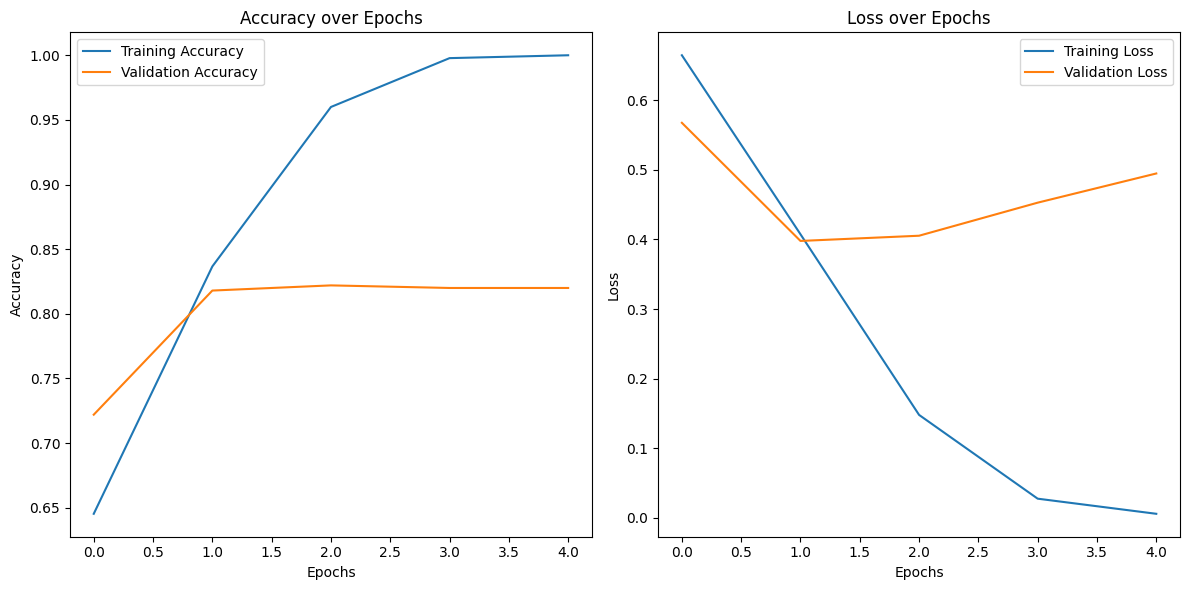

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       256
           1       0.83      0.79      0.81       244

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



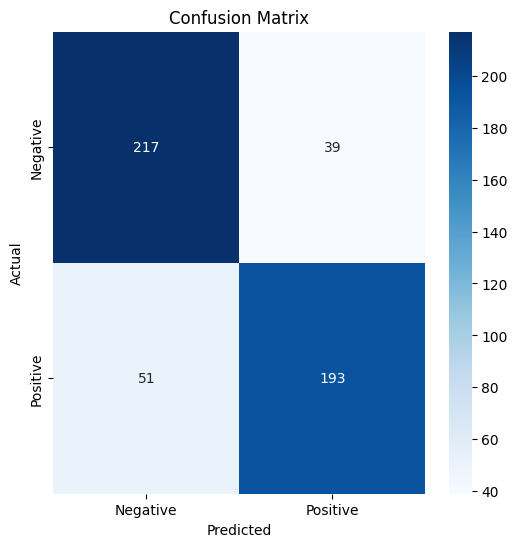

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
def predict_sentiment(review,tokenizer, model,maxlen):
  text = clean_review_with_stopwords_and_stemming(review)

  sequence = tokenizer.texts_to_sequences([text])
  padded_sequence = pad_sequences(sequence, padding='post', maxlen=maxlen)

  prediction = model.predict(padded_sequence)[0][0]

  if prediction > 0.5:
    return "Positive"
  else:
    return "Negative"

In [ ]:
model.save("cnn_sent_model.h5")

import pickle
pickle.dump(tokenizer,open("tokenizer.pkl","wb"))

In [ ]:
input_text = "This movie is amazing!"
predict_sentiment(input_text,tokenizer,model,maxlen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


'Positive'

In [ ]:
input_text = "it was bad movie"
predict_sentiment(input_text,tokenizer,model,maxlen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Negative'

In [ ]:
model.save("cnn_sent_model.h5")

import pickle
pickle.dump(tokenizer,open("tokenizer.pkl","wb"))